In [1]:
import mne

# Berlin BCI Competition IV

## Dataset 2a

> "This data set consists of EEG data from 9 subjects. The cue-based BCI
paradigm consisted of four different motor imagery tasks, namely the imag-
ination of movement of the left hand (class 1), right hand (class 2), both
feet (class 3), and tongue (class 4). Two sessions on different days were
recorded for each subject. Each session is comprised of 6 runs separated by
short breaks. One run consists of 48 trials (12 for each of the four possible
classes), yielding a total of 288 trials per session."

> "Twenty-two Ag/AgCl electrodes (with inter-electrode distances of 3.5 cm)
were used to record the EEG; the montage is shown in Figure 3 left. All
signals were recorded monopolarly with the left mastoid serving as reference
and the right mastoid as ground. The signals were sampled with 250 Hz and
bandpass-filtered between 0.5 Hz and 100 Hz. The sensitivity of the amplifier
was set to 100 μV. An additional 50 Hz notch filter was enabled to suppress
line noise."

> "In addition to the 22 EEG channels, 3 monopolar EOG channels were
2recorded and also sampled with 250 Hz (see Figure 3 right). They were
bandpass filtered between 0.5 Hz and 100 Hz (with the 50 Hz notch filter
enabled), and the sensitivity of the amplifier was set to 1 mV. The EOG
channels are provided for the subsequent application of artifact processing
methods [1] and must not be used for classification."

In [5]:
import os

data_folder = '/home/adam/Data/EEG/BCI/bci-iv-2a'
training_data_1 = os.path.join(data_folder, 'A01T.gdf')
data_1_raw = mne.io.read_raw_gdf(training_data_1, eog=['EOG-left','EOG-central','EOG-right'])
data_1_raw.info

Extracting EDF parameters from /home/adam/Data/EEG/BCI/bci-iv-2a/A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...


/home/adam/anaconda3/envs/chapter5/lib/python3.8/site-packages/mne/io/edf/edf.py:1044: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
<ipython-input-5-48bca96a6cc1>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  data_1_raw = mne.io.read_raw_gdf(training_data_1, eog=['EOG-left','EOG-central','EOG-right'])


<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 22 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

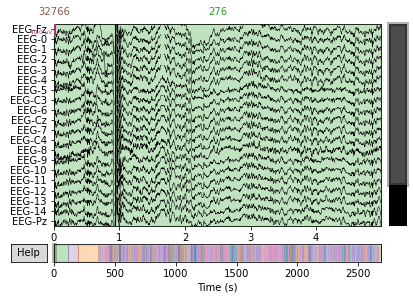

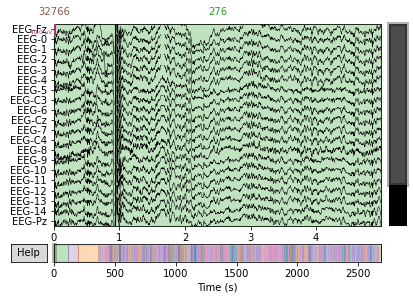

In [8]:
data_1_raw.plot(duration=5)

Notice the numbers above the plot: 32766 and 276. These are events that correspond to "Start of a new run" and "Idling EEG (eyes open)". We can interact with the events with MNE.

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
[[    0     0     5]
 [    0     0     3]
 [29683     0     5]
 [29683     0     4]
 [49955     0     5]]


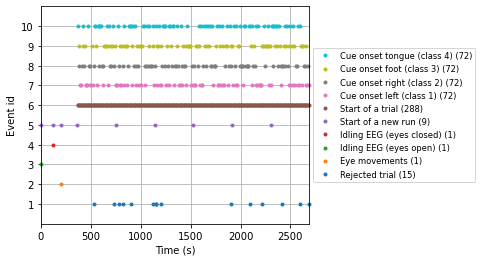

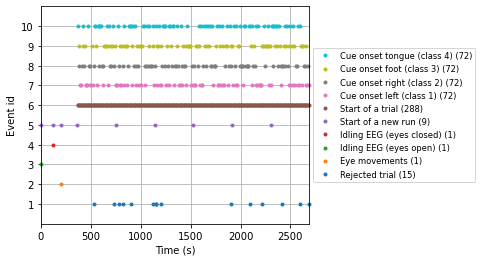

In [27]:
event_dict = {'Idling EEG (eyes open)': 3, 'Idling EEG (eyes closed)': 4, 'Start of a trial': 6, 'Cue onset left (class 1)': 7, 'Cue onset right (class 2)': 8, 'Cue onset foot (class 3)': 9, 'Cue onset tongue (class 4)': 10, 'Rejected trial': 1, 'Eye movements': 2, 'Start of a new run': 5}
data_1_events, ids = mne.events_from_annotations(data_1_raw)
print(data_1_events[:5])
mne.viz.plot_events(data_1_events, event_id=event_dict, sfreq=data_1_raw.info['sfreq'])